### Importando pacotes e dataset

In [70]:
import os

import matplotlib.pyplot as plt
# import earthpy as et
import numpy as np

import pandas as pd

df = pd.read_csv('83377.csv')

df.head()

,Unnamed: 0,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,...,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 19
0,12132121,83377,21/08/1961,0,NaN,22.6,14.1,27.9,NaN,36.0,...,NaN,NaN,NaN,10.0,NaN,NaN,22.14,36.25,1.366667,NaN
1,12132122,83377,21/08/1961,1200,NaN,23.8,15.2,NaN,13.8,37.0,...,NaN,9.0,1.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,12132123,83377,21/08/1961,1800,NaN,24.2,15.4,NaN,NaN,36.0,...,NaN,14.0,2.6,NaN,7.0,NaN,NaN,NaN,NaN,NaN
3,12132124,83377,22/08/1961,0,NaN,22.6,14.1,29.7,NaN,36.0,...,NaN,0.0,0.0,9.4,5.0,NaN,23.52,28.25,1.033333,NaN
4,12132125,83377,22/08/1961,1200,0.0,24.8,14.6,NaN,13.9,30.0,...,NaN,14.0,2.1,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [71]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None] * N + [df[feature][i - N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements


def dataframe_sort(df):
    # make list of original features without meantempm, mintempm, and maxtempm
    to_remove = [feature
                 for feature in df
                 if feature not in ['Precipitacao', 'TempBulboSeco', 'TempBulboUmido', 'TempMaxima', 'TempMinima',
                                    'UmidadeRelativa', 'PressaoAtmEstacao', 'PressaoAtmMar', 'DirecaoVento',
                                    'VelocidadeVento', 'Insolacao', 'Nebulosidade', 'Evaporacao Piche',
                                    'Temp Comp Media', 'Umidade Relativa Media', 'Velocidade do Vento Media']]

    # make a list of columns to keep
    to_keep = [col for col in df.columns if col not in to_remove]

    # select only the columns in to_keep and assign to df
    df = df[to_keep]

    for feature in df:
        if feature != 'Data':
            for N in range(1, 4):
                derive_nth_day_feature(df, feature, N)

    return df

In [72]:
# df = dataframe_sort(df)
# # df.head()
# df2 = df

In [73]:
df = df2

In [74]:
df = df[df['Precipitacao'].notna()]
# df = df[df['TempMaxima'].notna()]
df = df.fillna(df.mean())
df['Precipitacao'].value_counts()


0.0     13441
0.2       254
0.1       252
0.4       160
1.0       158
        ...  
37.8        1
73.6        1
46.1        1
55.1        1
49.9        1
Name: Precipitacao, Length: 648, dtype: int64

In [75]:
df.head()

,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,...,Evaporacao Piche_3,Temp Comp Media_1,Temp Comp Media_2,Temp Comp Media_3,Umidade Relativa Media_1,Umidade Relativa Media_2,Umidade Relativa Media_3,Velocidade do Vento Media_1,Velocidade do Vento Media_2,Velocidade do Vento Media_3
4,0.0,24.8,14.6,NaN,13.9,30.0,888.3,1013.285764,14.0,2.1,...,4.7875,23.52,22.16359,21.66,28.25,75.653846,47.0,1.033333,1.732081,1.941552
7,1.0,19.8,14.6,NaN,13.8,56.0,888.3,1013.285764,14.0,2.6,...,4.7875,21.04,22.16359,21.66,46.75,75.653846,47.0,2.066667,1.732081,1.941552
10,0.0,22.4,15.8,NaN,13.2,49.0,902.0,1013.285764,5.0,2.6,...,4.7875,22.56,22.16359,21.66,35.00,75.653846,47.0,2.066667,1.732081,1.941552
13,0.0,23.2,15.0,NaN,12.9,40.0,902.2,1013.285764,14.0,2.6,...,4.7875,21.90,22.16359,21.66,35.75,75.653846,47.0,1.533333,1.732081,1.941552
16,0.0,25.6,15.2,NaN,12.8,30.0,901.9,1013.285764,14.0,1.5,...,4.7875,22.64,22.16359,21.66,34.75,75.653846,47.0,2.033333,1.732081,1.941552


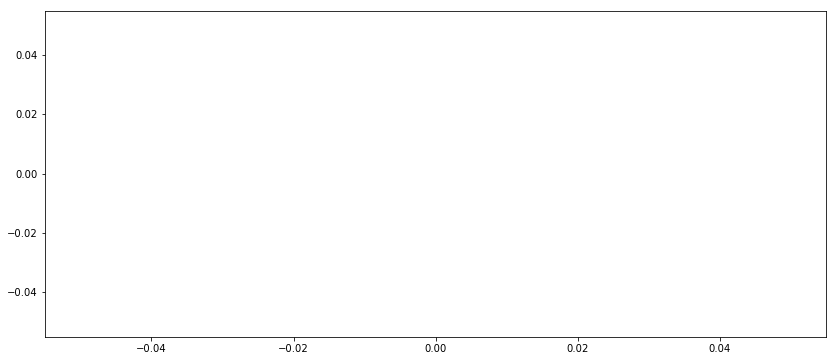

In [69]:
plt.figure(figsize=(14,6))
df['TempMaxima'].plot()